# Workshop3 - Upload to Data Lake  

วัตถุประสงค์ : ศึกษาการทำ Upload ข้อมูล โดยใช้Google Cloud Storage โดยอ้างอิงมาจากคอร์สRoad to data engineer ของ Datath

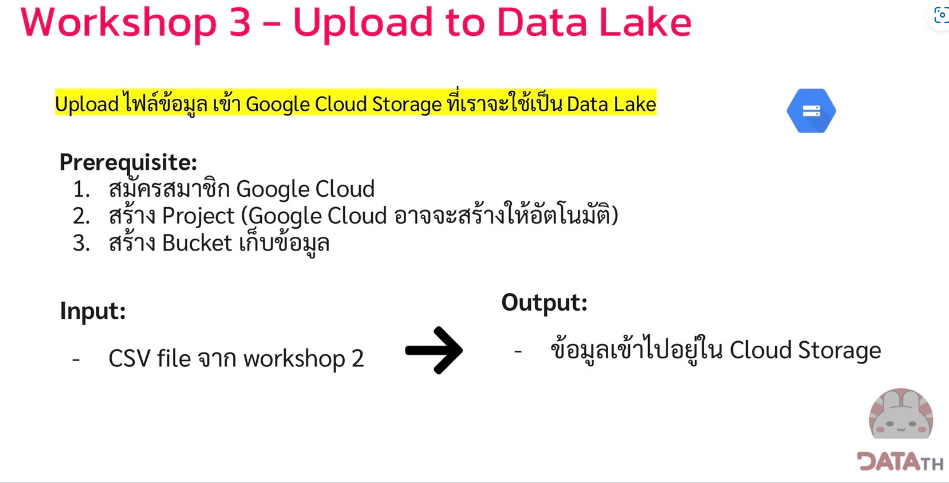

1. สร้าง bucket ผ่าน cloud shell

`gsutil mb gs://[BUCKET_NAME]`

2. Upload Data by using Cloud shell

- download file to cloudshell from link
`wget -O data.zip https://file.designil.com/bhXYol+`
- Unzip file  
`unzip data.zip`
- `gsutil cp [File] gs://[BUCKET]` Copy (upload) file to bucket
    - ตัวอย่าง `gsutil cp ws2-output.csv gs://patlee-data-lake`

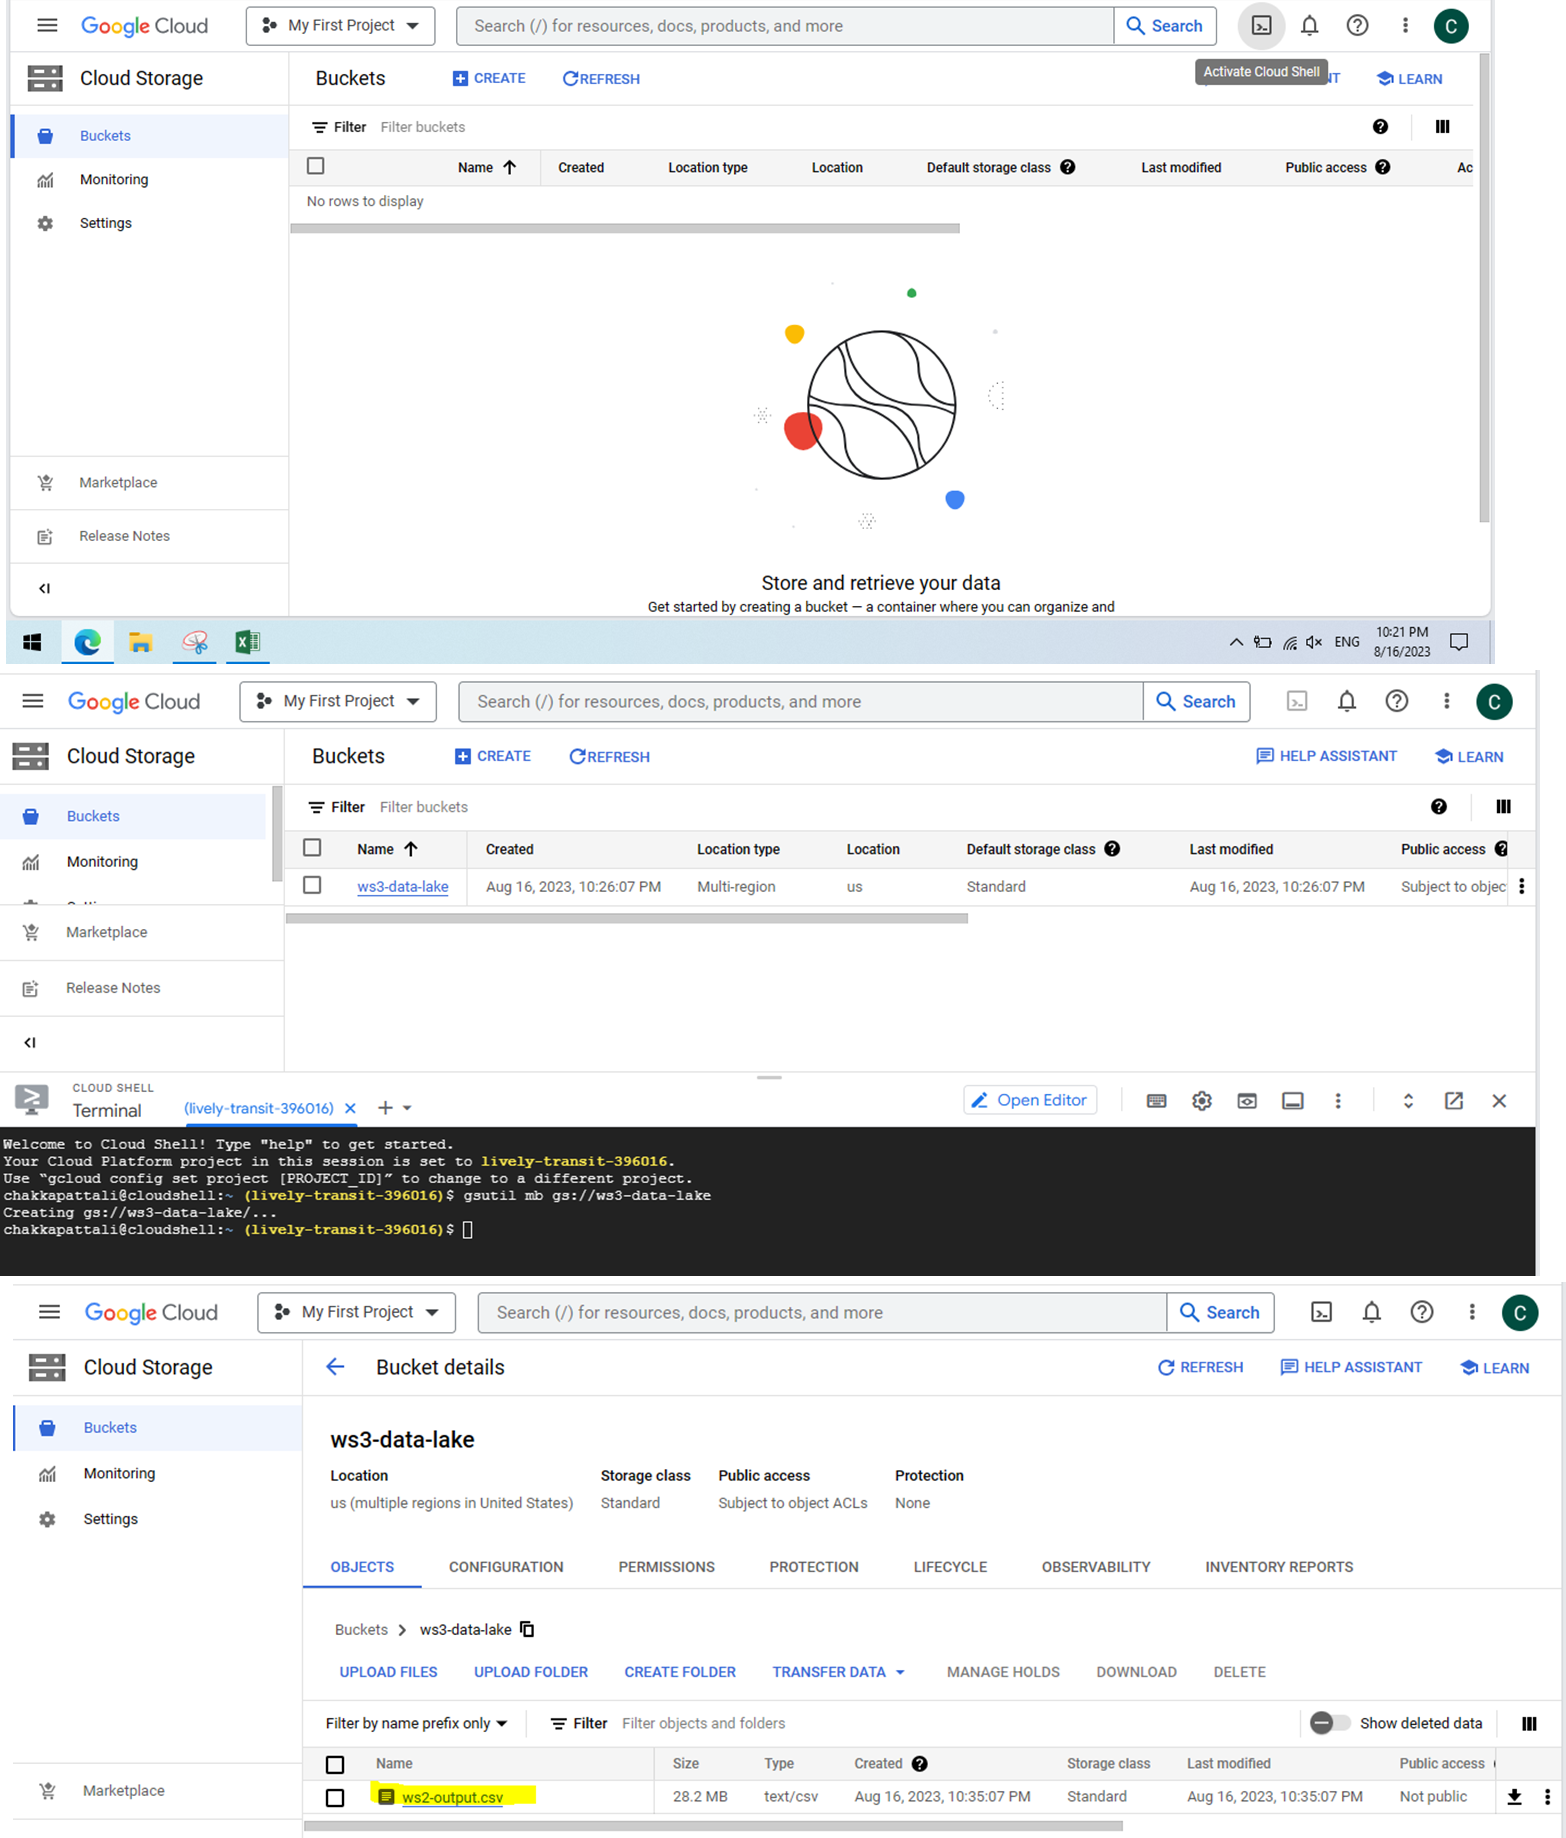

ความแตกต่างระหว่างคำสั่ง `gsutil` VS `gcloud`
>The **gsutil** is a Python application that lets you access Google Cloud Storage from the command line. You can use gsutil to do a wide range of bucket and object management tasks, including:
Creating and deleting buckets. Uploading, downloading, and deleting objects. Listing buckets and objects. Moving, copying, and renaming objects. Editing object and bucket ACLs.

>The **gcloud** command-line interface is the primary CLI tool to create and manage Google Cloud resources. You can use this tool to perform many common platform tasks either from the command line or in scripts and other automations.

>For example, you can use the gcloud CLI to create and manage:

>Google Compute Engine virtual machine instances and other resources, Google Cloud SQL instances, Google Kubernetes Engine clusters, Google Cloud Dataproc clusters and jobs, Google Cloud DNS managed zones and record sets, Google Cloud Deployment manager deployments.  

[Introducing gcloud storage: up to 94% faster data transfers for Cloud Storage](https://cloud.google.com/blog/products/storage-data-transfer/new-gcloud-storage-cli-for-your-data-transfers?fbclid=IwAR2eQ_k6_Iy3N9cQFcJGroP9AFKdeXFV-XqALtYpgGDIfw66CZp5cexbKBQ)

> **สรุป**  
ด้านความเร็วในการประมวลผล: `gcloud` มันพัฒนามาจาก `gsutil` มันก็เลยเร็วกว่า  
การใช้งาน : `gsutil` จะใช้ภายใน google cloud storage ส่วน `gcloud` ใช้ได้กับบริการทั้งหมดของGoogle cloud platform

In [ ]:
# OR 2.Upload Data via python

from google.cloud import storage

def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"

    # The ID of your GCS object
    # source_blob_name = "storage-object-name"

    # The path to which the file should be downloaded
    # destination_file_name = "local/path/to/file"

    storage_client = storage.Client()

    bucket = storage_client.bucket(bucket_name)

    # Construct a client side representation of a blob.
    # Note `Bucket.blob` differs from `Bucket.get_blob` as it doesn't retrieve
    # any content from Google Cloud Storage. As we don't need additional data,
    # using `Bucket.blob` is preferred here.
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

    print(
        "Downloaded storage object {} from bucket {} to local file {}.".format(
            source_blob_name, bucket_name, destination_file_name
        )
    )


def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"
    # The path to your file to upload
    # source_file_name = "local/path/to/file"
    # The ID of your GCS object
    # destination_blob_name = "storage-object-name"

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)

    print(
        f"File {source_file_name} uploaded to {destination_blob_name}."
    )

if __name__ == "__main__":
    upload = input("upload(u) or download(d) ?")
    local_name = input("What's local name upload:")
    gcs_file_name = input("What's gcs file name:")

    if upload.lower() == "u" or upload.lower() == "upload":
        upload_blob(
                bucket_name = "patlee-data-lake",
                source_file_name = local_name,
                destination_blob_name = gcs_file_name
            )
    elif upload.lower() == "d" or upload.lower() == "download":
        upload_blob(
                bucket_name = "patlee-data-lake",
                source_blob_name = gcs_file_name,
                destination_file_name = local_name
            )
    else:
        print ("Please select upload(u) or download(d)")

วิธีการ Upload Data via python จะค่อนข้างยาก สามารถดูref เพื่อประกอบ

 https://www.youtube.com/watch?v=pEbL_TT9cHg  
https://cloud.google.com/storage/docs/uploading-objects#storage-upload-object-python

### จบ Workshop3